# **Mission 3_주차 등록 수요 데이터 분석**

## <미션>

* 1. 데이터 기초 정보 확인하기
    - 기초 통계량, NaN 값 확인 등 기본 분석 수행
* 2. 단변량 분석 
    - 수치형, 범주형 데이터
    - 단일 변수로 분석 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
    - 여러 변수를 묶어서 분석 : 건물구분, 공급유형
* 3. 이변량 분석
    - 수치형 vs 수치형
        - 전체 상관계수를 구하고 시각화
        - 상관계수가 높은 변수에 대한 산점도를 구하기
    - 범주형 vs 수치형
        - 범주 그룹간에 평균의 차이가 있는지 검증
        - bar 그래프를 통해 평균의 차이를 시각화

## <환경설정 >

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
* 필요하다고 판단되는 라이브러리를 추가하세요.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 필요한 라이브러리, 함수를 추가하시오.

import scipy.stats as spst   

### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [8]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기

* 파일명 : registerd_parking_preprocessed.csv
* data 변수에 저장하기 

In [5]:
data = pd.read_csv('./registerd_parking_preprocessed.csv')

## 1. 데이터 기초 정보 확인하기

- 데이터의 양, 컬럼명, 데이터 타입 확인하기
- 데이터프레임 전체에 대한 기초통계량 구하기
- 결측치가 있는지 확인하고, 결측치가 있는 경우 조치하기



#### &nbsp;&nbsp; 1-1) 데이터프레임 크기 확인

In [4]:
## shape

data.shape

(373, 22)

#### &nbsp;&nbsp; 1-2) 컬럼명, 데이터 개수, 데이터 타입 확인

In [5]:
## info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   단지코드         373 non-null    object 
 1   총세대수         373 non-null    int64  
 2   지역           373 non-null    object 
 3   공가수          373 non-null    float64
 4   지하철역수        355 non-null    float64
 5   버스정류장수       372 non-null    float64
 6   등록차량수        373 non-null    float64
 7   전용면적_10_30   373 non-null    int64  
 8   전용면적_30_40   373 non-null    int64  
 9   전용면적_40_50   373 non-null    int64  
 10  전용면적_50_100  373 non-null    int64  
 11  전용면적_100이상   373 non-null    int64  
 12  임대보증금        373 non-null    float64
 13  임대료          373 non-null    float64
 14  상가비율         373 non-null    float64
 15  아파트비율        373 non-null    float64
 16  공급유형_공공임대비율  373 non-null    float64
 17  공급유형_국민임대비율  373 non-null    float64
 18  공급유형_영구임대비율  373 non-null    float64
 19  공급유형_임대상

#### &nbsp;&nbsp; 1-3) 기초통계 확인

In [6]:
# describe().T 활용

data.describe().T

count          mean           std       min           25%  \
총세대수         373.0  7.251743e+02  4.113760e+02  26.00000  4.510000e+02   
공가수          373.0  1.328150e+01  1.052537e+01   0.00000  5.000000e+00   
지하철역수        355.0  1.183099e-01  3.566597e-01   0.00000  0.000000e+00   
버스정류장수       372.0  3.690860e+00  2.751843e+00   0.00000  2.000000e+00   
등록차량수        373.0  5.683405e+02  3.862154e+02  13.00000  2.940000e+02   
전용면적_10_30   373.0  1.299223e+02  2.832333e+02   0.00000  0.000000e+00   
전용면적_30_40   373.0  2.324290e+02  2.138379e+02   0.00000  3.600000e+01   
전용면적_40_50   373.0  1.645147e+02  1.776222e+02   0.00000  0.000000e+00   
전용면적_50_100  373.0  1.939169e+02  2.884740e+02   0.00000  0.000000e+00   
전용면적_100이상   373.0  6.702413e-02  2.901816e-01   0.00000  0.000000e+00   
임대보증금        373.0  2.374290e+07  1.735846e+07   0.00000  1.421895e+07   
임대료          373.0  1.809387e+05  1.134319e+05   0.00000  1.125907e+05   
상가비율         373.0  2.102335e-03  7.903783e-03   0.00000  0.000000e+00   
아파트비율        373.0  9.978977e-01  7.903783e-03   0.94404  1.000000e+00   
공급유형_공공임대비율  373.0  1.091806e-01  3.093390e-01   0.00000  0.000000e+00   
공급유형_국민임대비율  373.0  7.311315e-01  4.352446e-01   0.00000  0.000000e+00   
공급유형_영구임대비율  373.0  8.464886e-02  2.591789e-01   0.00000  0.000000e+00   
공급유형_임대상가비율  373.0  2.102335e-03  7.903783e-03   0.00000  0.000000e+00   
공급유형_장기전세비율  373.0  2.680965e-03  5.177804e-02   0.00000  0.000000e+00   
공급유형_행복주택비율  373.0  7.025572e-02  2.536192e-01   0.00000  0.000000e+00   

                      50%           75%           max  
총세대수         6.350000e+02  9.350000e+02  2.568000e+03  
공가수          1.200000e+01  1.900000e+01  5.500000e+01  
지하철역수        0.000000e+00  0.000000e+00  2.000000e+00  
버스정류장수       3.000000e+00  4.000000e+00  2.000000e+01  
등록차량수        5.050000e+02  7.610000e+02  2.550000e+03  
전용면적_10_30   0.000000e+00  1.490000e+02  1.885000e+03  
전용면적_30_40   2.040000e+02  3.700000e+02  1.173000e+03  
전용면적_40_50   1.330000e+02  2.640000e+02  8.700000e+02  
전용면적_50_100  7.500000e+01  2.670000e+02  1.533000e+03  
전용면적_100이상   0.000000e+00  0.000000e+00  2.000000e+00  
임대보증금        1.939399e+07  2.794011e+07  1.843054e+08  
임대료          1.520608e+05  2.108951e+05  8.798909e+05  
상가비율         0.000000e+00  0.000000e+00  5.595974e-02  
아파트비율        1.000000e+00  1.000000e+00  1.000000e+00  
공급유형_공공임대비율  0.000000e+00  0.000000e+00  1.000000e+00  
공급유형_국민임대비율  1.000000e+00  1.000000e+00  1.000000e+00  
공급유형_영구임대비율  0.000000e+00  0.000000e+00  1.000000e+00  
공급유형_임대상가비율  0.000000e+00  0.000000e+00  5.595974e-02  
공급유형_장기전세비율  0.000000e+00  0.000000e+00  1.000000e+00  
공급유형_행복주택비율  0.000000e+00  0.000000e+00  1.000000e+00

#### &nbsp;&nbsp; 1-4) 결측치(N/A) 개수 확인

In [7]:
## 결측치가 있는지 확인하기 : isna

data.isna().sum()

단지코드            0
총세대수            0
지역              0
공가수             0
지하철역수          18
버스정류장수          1
등록차량수           0
전용면적_10_30      0
전용면적_30_40      0
전용면적_40_50      0
전용면적_50_100     0
전용면적_100이상      0
임대보증금           0
임대료             0
상가비율            0
아파트비율           0
공급유형_공공임대비율     0
공급유형_국민임대비율     0
공급유형_영구임대비율     0
공급유형_임대상가비율     0
공급유형_장기전세비율     0
공급유형_행복주택비율     0
dtype: int64

In [8]:
## 결측치가 있는 컬럼은 무엇인가요?


In [9]:
## 결측치 처리 : dropna, fillna


data.fillna(0, inplace = True)

In [10]:
## 결측치 처리 결과 확인하기 : info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   단지코드         373 non-null    object 
 1   총세대수         373 non-null    int64  
 2   지역           373 non-null    object 
 3   공가수          373 non-null    float64
 4   지하철역수        373 non-null    float64
 5   버스정류장수       373 non-null    float64
 6   등록차량수        373 non-null    float64
 7   전용면적_10_30   373 non-null    int64  
 8   전용면적_30_40   373 non-null    int64  
 9   전용면적_40_50   373 non-null    int64  
 10  전용면적_50_100  373 non-null    int64  
 11  전용면적_100이상   373 non-null    int64  
 12  임대보증금        373 non-null    float64
 13  임대료          373 non-null    float64
 14  상가비율         373 non-null    float64
 15  아파트비율        373 non-null    float64
 16  공급유형_공공임대비율  373 non-null    float64
 17  공급유형_국민임대비율  373 non-null    float64
 18  공급유형_영구임대비율  373 non-null    float64
 19  공급유형_임대상

<br><br><hr>

##  2. 단변량 분석



#### &nbsp;&nbsp; 2-1)  등록 차량수

count        mean         std   min    25%    50%    75%     max
등록차량수  373.0  568.340483  386.215418  13.0  294.0  505.0  761.0  2550.0

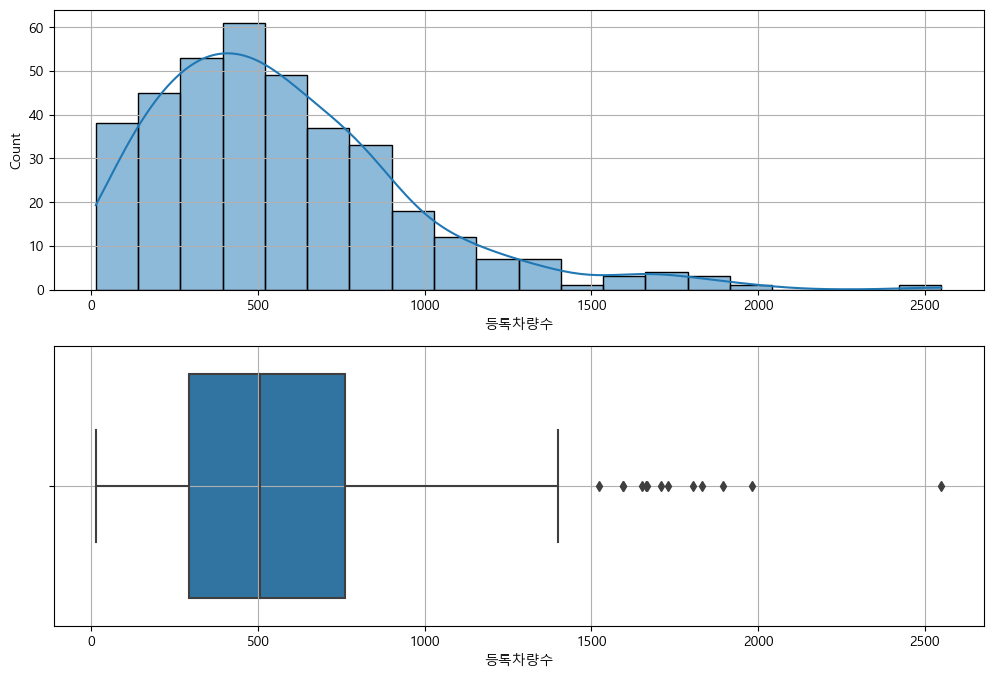

In [11]:
## '등록차량수' 변수의 기초통계량 확인
display(data[['등록차량수']].describe().T)

## 2행 1열 그래프 그리기

plt.figure(figsize = (12,8))

## '등록차량수' 변수의 histplot그리기

plt.subplot(2,1,1)
sns.histplot(x = '등록차량수', data = data, kde = True)
plt.grid()

## '등록차량수' 변수의 boxplot 그리기

plt.subplot(2,1,2)
sns.boxplot(x = '등록차량수', data = data)
plt.grid()

plt.show()

13.0 1400.0


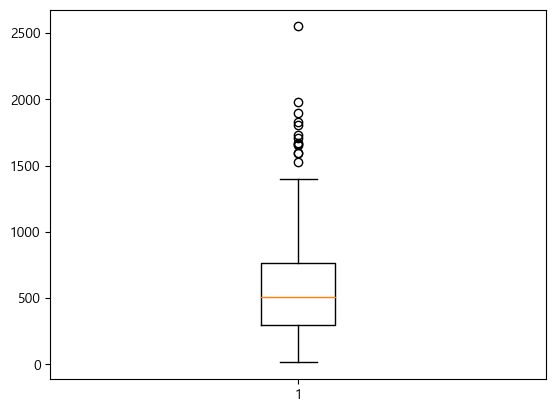

In [12]:
# boxplot의 whiskers 값 구하기

box = plt.boxplot(data['등록차량수'])

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

#### &nbsp;&nbsp; 2-2) 수치형 데이터

* 기초 통계량 분석
* 그래프 : boxplot, histplot

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-1) 총 세대수

count        mean         std   min    25%    50%    75%     max
총세대수  373.0  725.174263  411.376047  26.0  451.0  635.0  935.0  2568.0

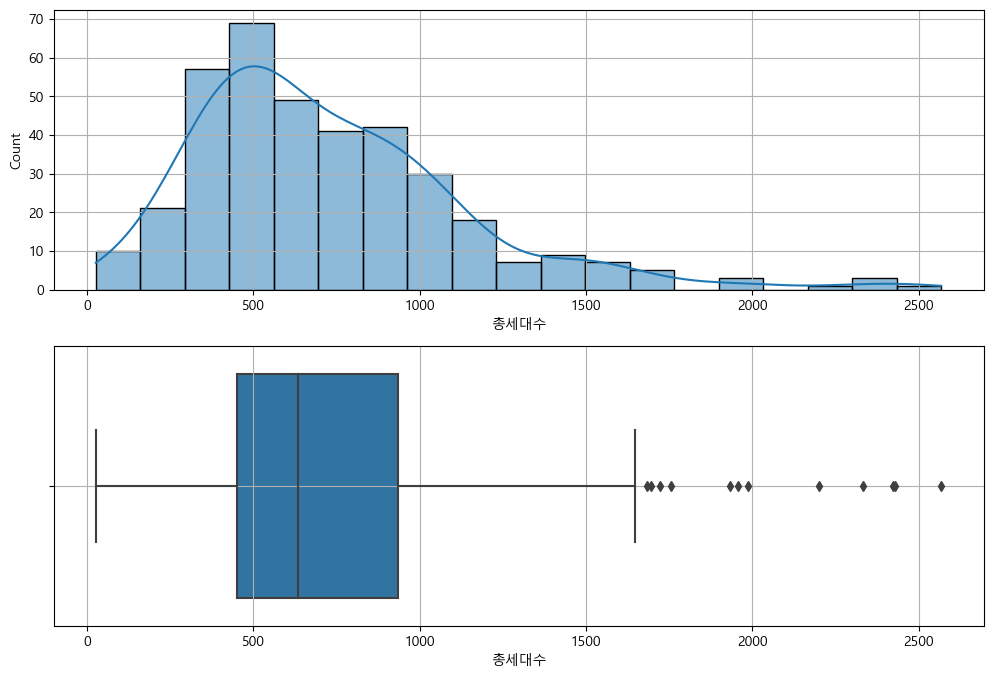

In [13]:
## 기초통계량 확인
display(data[['총세대수']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.histplot(x = '총세대수', data = data, kde = True)
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.boxplot(x = '총세대수', data = data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-2) 공가수

count       mean        std  min  25%   50%   75%   max
공가수  373.0  13.281501  10.525372  0.0  5.0  12.0  19.0  55.0

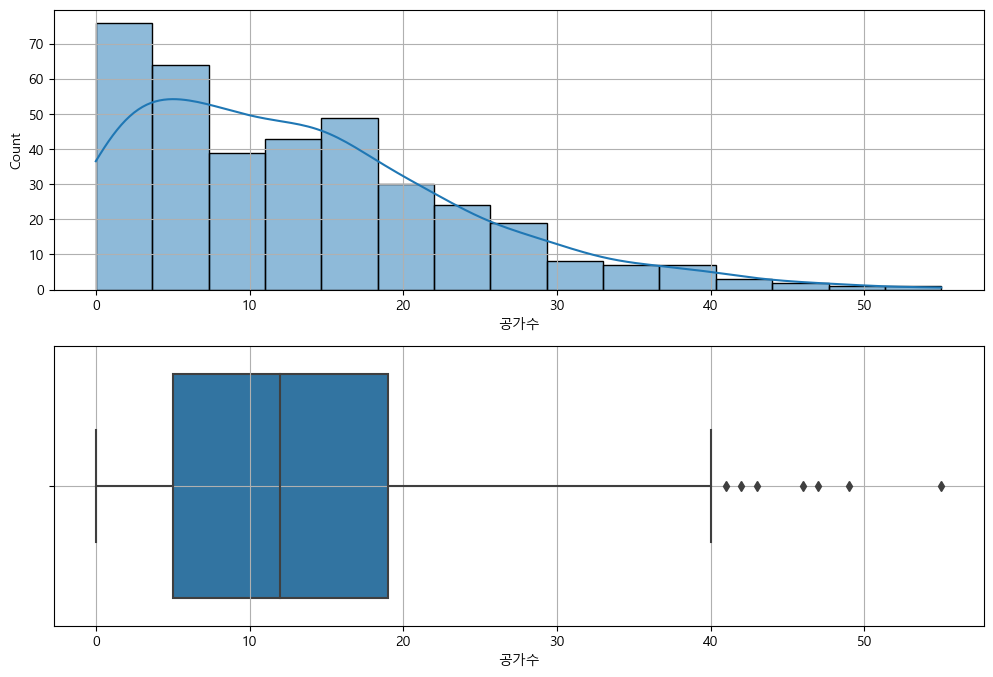

In [14]:
## 기초통계량 확인
display(data[['공가수']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.histplot(x = '공가수', data = data, kde = True)
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.boxplot(x = '공가수', data = data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-3) 지하철역 수

count      mean       std  min  25%  50%  75%  max
지하철역수  373.0  0.112601  0.348849  0.0  0.0  0.0  0.0  2.0

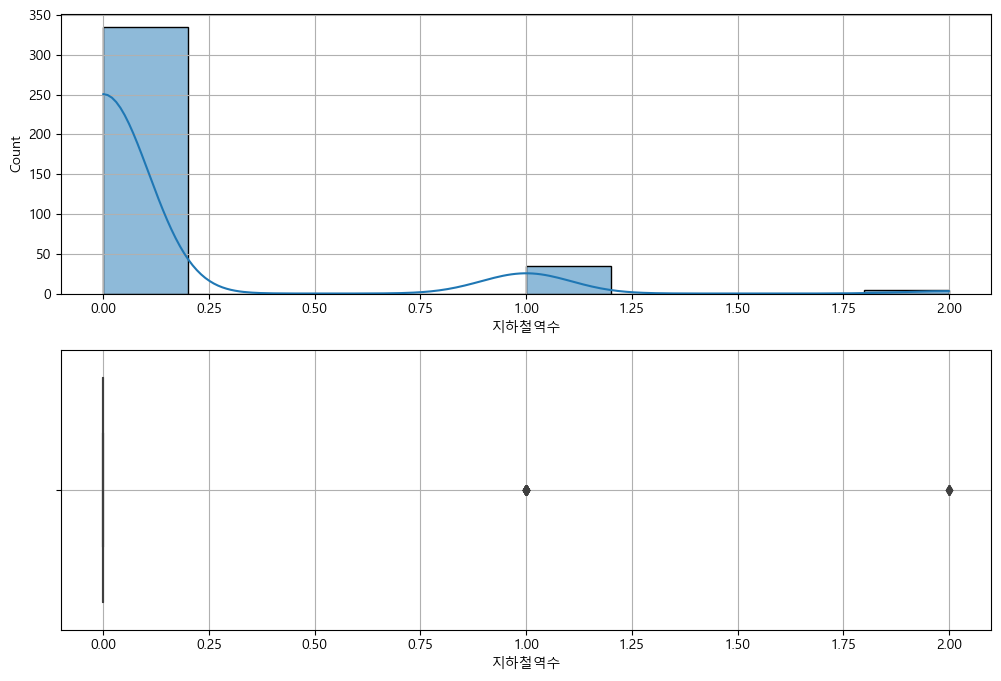

In [15]:
## 기초통계량 확인
display(data[['지하철역수']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.histplot(x = '지하철역수', data = data, kde = True)
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.boxplot(x = '지하철역수', data = data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-4) 버스정류장수

count      mean       std  min  25%  50%  75%   max
버스정류장수  373.0  3.680965  2.754778  0.0  2.0  3.0  4.0  20.0

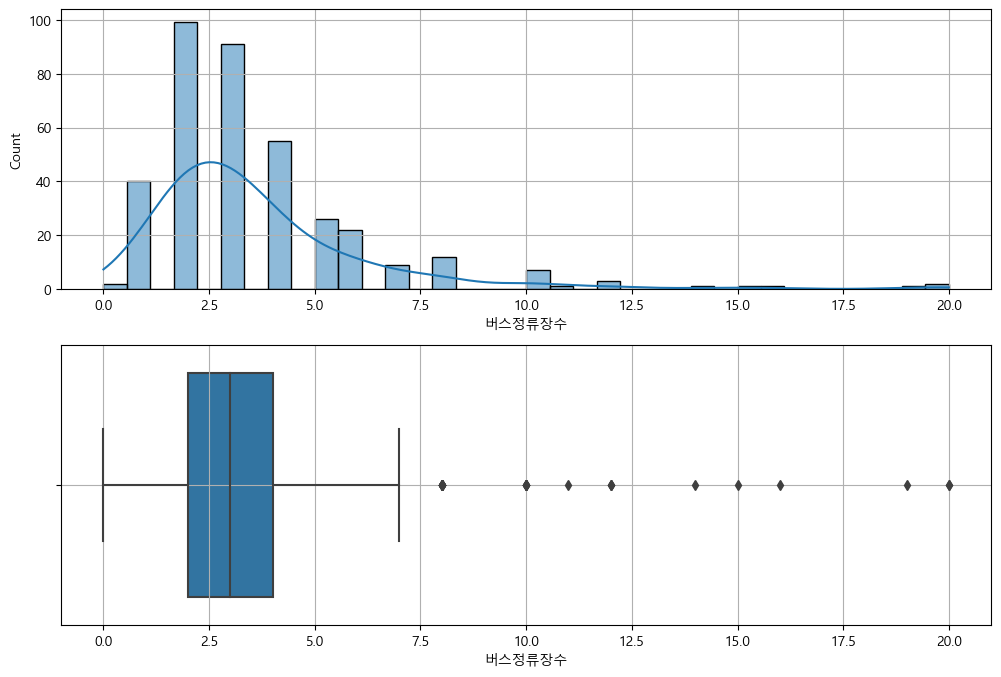

In [16]:
## 기초통계량 확인
display(data[['버스정류장수']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.histplot(x = '버스정류장수', data = data, kde = True)
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.boxplot(x = '버스정류장수', data = data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-5) 임대료

count           mean           std  min            25%            50%  \
임대료  373.0  180938.674278  113431.94634  0.0  112590.674157  152060.759219   

               75%            max  
임대료  210895.080214  879890.922432

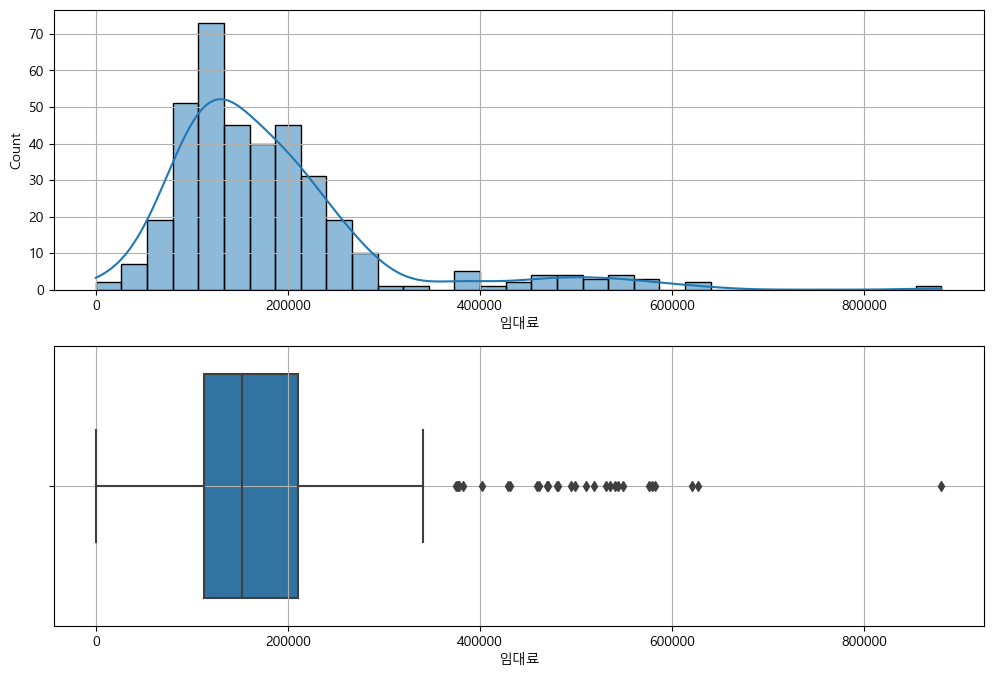

In [17]:
## 기초통계량 확인
display(data[['임대료']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.histplot(x = '임대료', data = data, kde = True)
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.boxplot(x = '임대료', data = data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-6) 임대보증금

count          mean           std  min           25%           50%  \
임대보증금  373.0  2.374290e+07  1.735846e+07  0.0  1.421895e+07  1.939399e+07   

                75%           max  
임대보증금  2.794011e+07  1.843054e+08

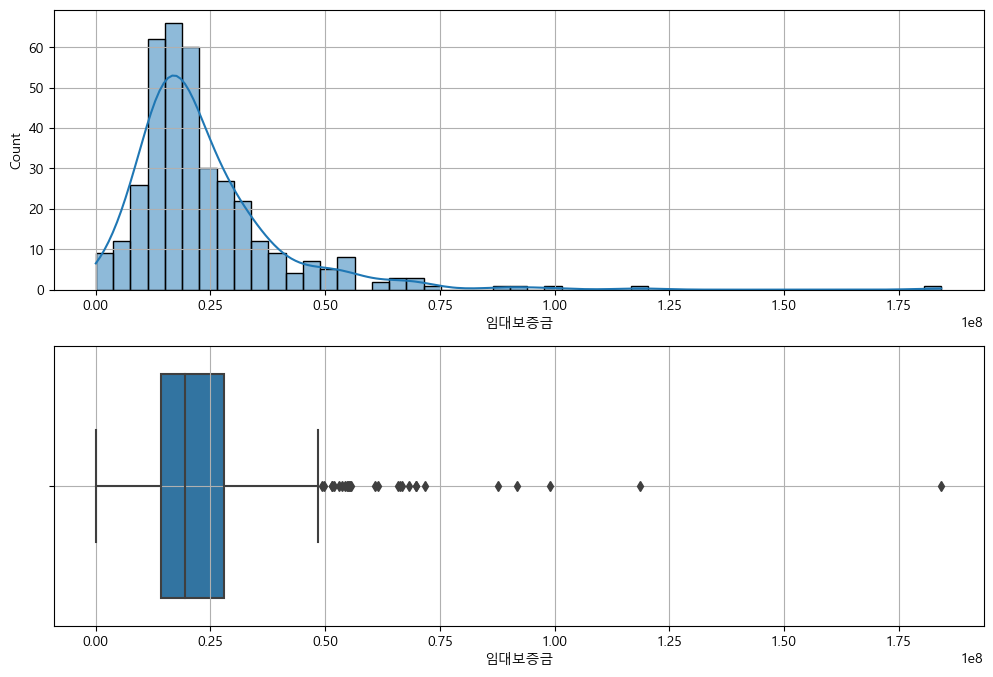

In [18]:
## 기초통계량 확인
display(data[['임대보증금']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.histplot(x = '임대보증금', data = data, kde = True)
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.boxplot(x = '임대보증금', data = data)
plt.grid()

plt.show()

#### &nbsp;&nbsp; 2-3) 수치형 데이터 - pivot 테이블로 구성된 데이터를 재구성하여 분석하기

* pd.melt 활용
    * pivot table 형태로 구성된 데이터프레임을 구분자(variable)와 값(value)로 재구성하기
    * pd.melt(dataframe명, id_vars = [identifier로 사용될 컬럼명], value_vars = [구분자로 쓰일 컬럼명] )
* 기초 통계량 분석
* 그래프 : boxplot, barplot

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-1) 전용면적 구간별 세대수

In [19]:
data.columns

Index(['단지코드', '총세대수', '지역', '공가수', '지하철역수', '버스정류장수', '등록차량수', '전용면적_10_30',
       '전용면적_30_40', '전용면적_40_50', '전용면적_50_100', '전용면적_100이상', '임대보증금', '임대료',
       '상가비율', '아파트비율', '공급유형_공공임대비율', '공급유형_국민임대비율', '공급유형_영구임대비율',
       '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율'],
      dtype='object')

In [20]:
## 단지코드와 전용면적에 관련된 column 추출하기 
## area_data 변수에 저장

area_data = data.loc[:, ['단지코드','전용면적_10_30',  '전용면적_30_40', '전용면적_40_50', '전용면적_50_100', '전용면적_100이상']].copy()

In [21]:
## 전용면적에 관련된 컬럼들을 pd.melt로 재구성하기
## melt_area_data 변수에 저장

melt_area_data = pd.melt(area_data, id_vars = '단지코드',
                value_vars = ['전용면적_10_30',  '전용면적_30_40', '전용면적_40_50', '전용면적_50_100', '전용면적_100이상'])

## column명 변경하기 : 'variable' : '전용면적구간', 'value' : '세대수'
melt_area_data.rename(columns={'variable' : '전용면적구간', 'value' : '세대수'}, inplace=True)
melt_area_data.head()

단지코드      전용면적구간  세대수
0  C2483  전용면적_10_30    0
1  C2515  전용면적_10_30    0
2  C1407  전용면적_10_30    0
3  C1945  전용면적_10_30    0
4  C1470  전용면적_10_30    0

count        mean         std  min  25%  50%    75%     max
세대수  1865.0  144.169973  233.178958  0.0  0.0  0.0  224.0  1885.0

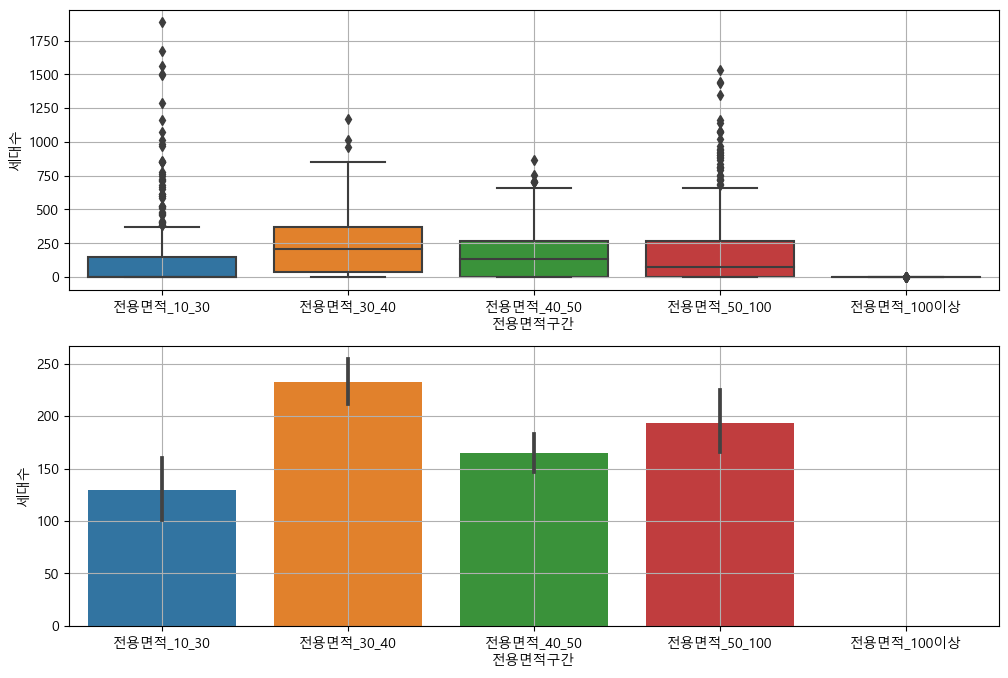

In [22]:
## 기초통계량 확인
display(melt_area_data[['세대수']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.boxplot(data=melt_area_data, x='전용면적구간', y='세대수')
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.barplot(data=melt_area_data, x='전용면적구간', y='세대수')
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-2) 건물구분별 면적 비율

In [23]:
data.columns

Index(['단지코드', '총세대수', '지역', '공가수', '지하철역수', '버스정류장수', '등록차량수', '전용면적_10_30',
       '전용면적_30_40', '전용면적_40_50', '전용면적_50_100', '전용면적_100이상', '임대보증금', '임대료',
       '상가비율', '아파트비율', '공급유형_공공임대비율', '공급유형_국민임대비율', '공급유형_영구임대비율',
       '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율'],
      dtype='object')

In [24]:
## 단지코드와  건물구분(상가, 아파트)에 관련된 column 추출하기 
## building_data 변수에 저장

building_data = data.loc[:, ['단지코드','상가비율', '아파트비율']]

In [25]:
## 건물구분에 관련된 컬럼들을 pd.melt로 재구성하기
## melt_building_data 변수에 저장

melt_building_data = pd.melt(building_data, id_vars = '단지코드',  value_vars = ['상가비율', '아파트비율'])

## column명 변경하기 : {'variable' : '건물구분', 'value' : '면적비율'}
melt_building_data.rename(columns={'variable' : '건물구분', 'value' : '면적비율'}, inplace=True)


melt_building_data.head()

단지코드  건물구분  면적비율
0  C2483  상가비율   0.0
1  C2515  상가비율   0.0
2  C1407  상가비율   0.0
3  C1945  상가비율   0.0
4  C1470  상가비율   0.0

In [26]:
## melt_building_data의 '면적비율'에 대한 기초통계량 확인
display(melt_building_data[['면적비율']].describe().T)


## 범주별(상가/아파트) '면적비율' 기초 통계량 확인
print("상가 비율")
display(melt_building_data[melt_building_data['건물구분'] == '상가비율'][['면적비율']].describe().T)
print("아파트 비율")
display(melt_building_data[melt_building_data['건물구분'] == '아파트비율'][['면적비율']].describe().T)

count  mean       std  min  25%  50%  75%  max
면적비율  746.0   0.5  0.498294  0.0  0.0  0.5  1.0  1.0

상가 비율


count      mean       std  min  25%  50%  75%      max
면적비율  373.0  0.002102  0.007904  0.0  0.0  0.0  0.0  0.05596

아파트 비율


count      mean       std      min  25%  50%  75%  max
면적비율  373.0  0.997898  0.007904  0.94404  1.0  1.0  1.0  1.0

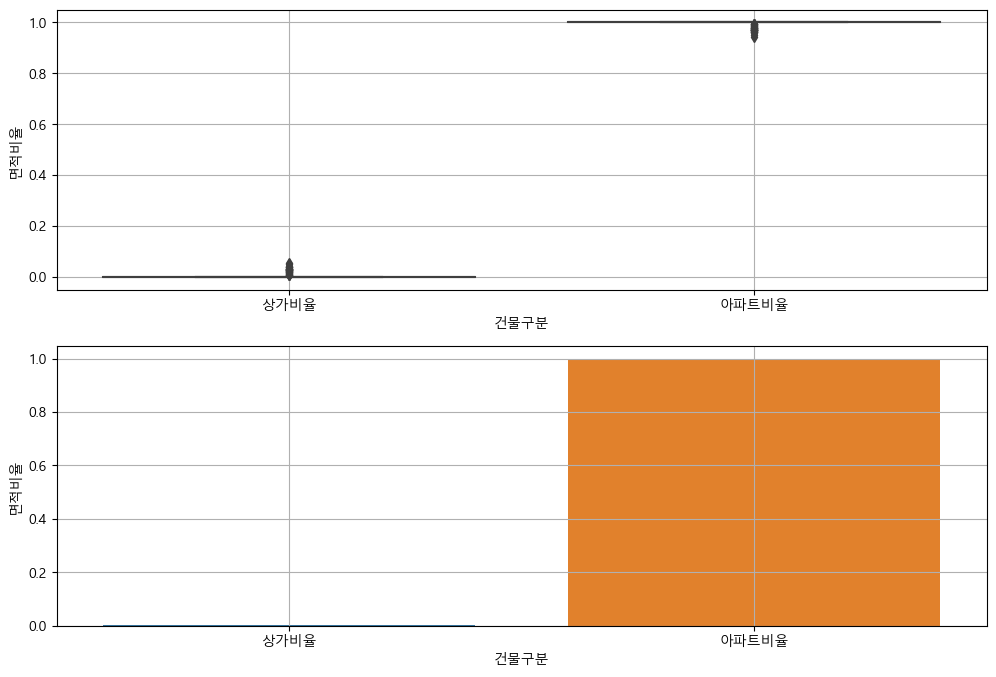

In [27]:
## 그래프 분석 

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.boxplot(data=melt_building_data, x='건물구분', y='면적비율')
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.barplot(data=melt_building_data, x='건물구분', y='면적비율')
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-3) 공급유형별 면적 비율

In [28]:
data.columns

Index(['단지코드', '총세대수', '지역', '공가수', '지하철역수', '버스정류장수', '등록차량수', '전용면적_10_30',
       '전용면적_30_40', '전용면적_40_50', '전용면적_50_100', '전용면적_100이상', '임대보증금', '임대료',
       '상가비율', '아파트비율', '공급유형_공공임대비율', '공급유형_국민임대비율', '공급유형_영구임대비율',
       '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율'],
      dtype='object')

In [29]:
## 단지코드와  공급유형에 관련된 column 추출하기 
## supply_data 변수에 저장

supply_data = data.loc[:, ['단지코드', '공급유형_공공임대비율', '공급유형_국민임대비율', 
                         '공급유형_영구임대비율', '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율']].copy()

In [30]:
## 건물구분에 관련된 컬럼들을 pd.melt로 재구성하기
## melt_supply_data 변수에 저장

melt_supply_data = pd.melt(supply_data, id_vars = '단지코드',
                value_vars = [ '공급유형_공공임대비율', '공급유형_국민임대비율', 
                                '공급유형_영구임대비율', '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율'])

## column명 변경하기 : {'variable' : '공급유형', 'value' : '면적비율'}
melt_supply_data.rename(columns={'variable' : '공급유형', 'value' : '면적비율'}, inplace=True)

melt_supply_data.head()

단지코드         공급유형  면적비율
0  C2483  공급유형_공공임대비율   0.0
1  C2515  공급유형_공공임대비율   0.0
2  C1407  공급유형_공공임대비율   0.0
3  C1945  공급유형_공공임대비율   0.0
4  C1470  공급유형_공공임대비율   0.0

count      mean       std  min  25%  50%  75%  max
면적비율  2238.0  0.166667  0.367543  0.0  0.0  0.0  0.0  1.0

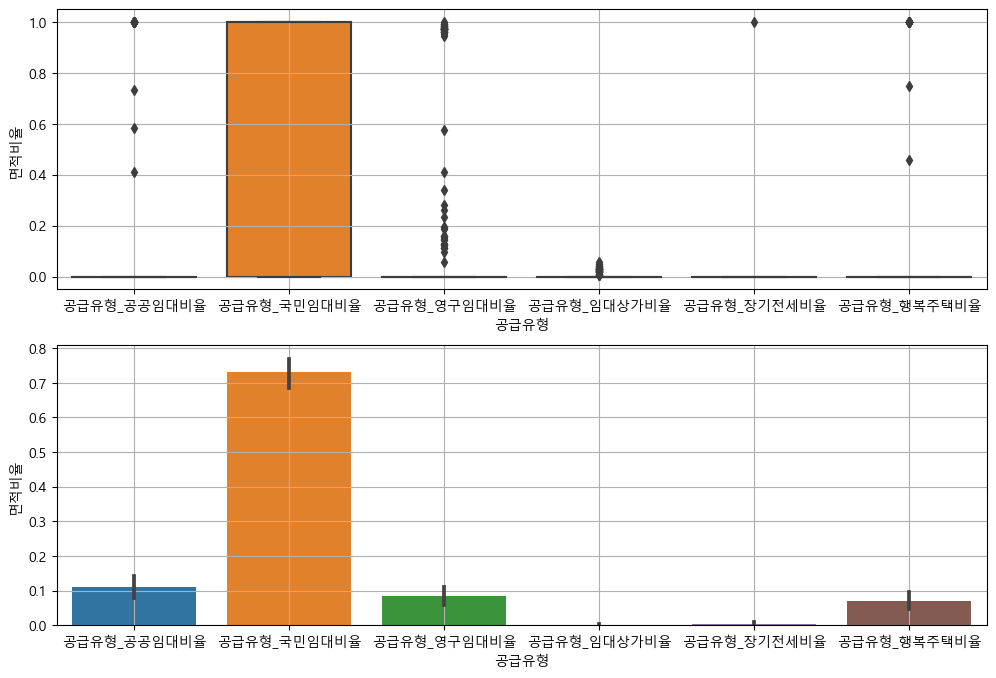

In [31]:
## 기초통계량 확인
display(melt_supply_data[['면적비율']].describe().T)

plt.figure(figsize = (12,8))

##  histplot

plt.subplot(2,1,1)
sns.boxplot(data=melt_supply_data, x='공급유형', y='면적비율')
plt.grid()

## boxplot 

plt.subplot(2,1,2)
sns.barplot(data=melt_supply_data, x='공급유형', y='면적비율')
plt.grid()

plt.show()

#### &nbsp;&nbsp; 2-4) 범주형 데이터 

   * 분석 방법 : 범주별 빈도수, countplot

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-4-1) 지역

경기도        77
경상남도       47
강원도        33
충청북도       27
전라남도       23
대전광역시      22
전라북도       20
광주광역시      20
부산광역시      19
경상북도       18
충청남도       18
대구광역시      16
제주특별자치도    14
울산광역시       8
서울특별시       7
세종특별자치시     4
Name: 지역, dtype: int64


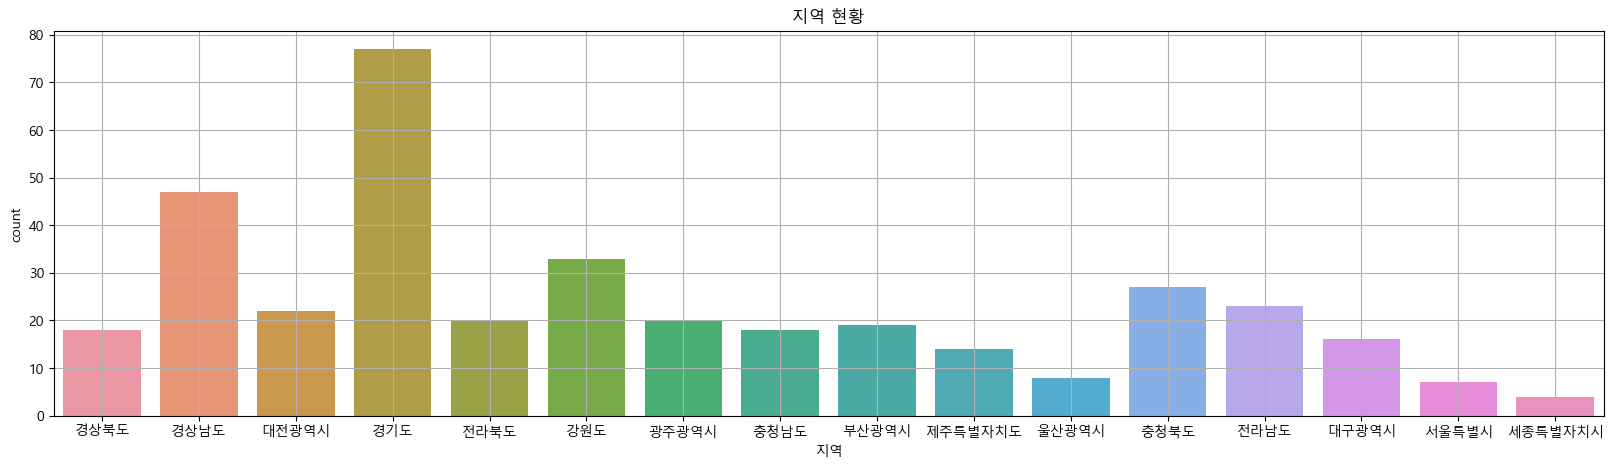

In [14]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
print(data['지역'].value_counts())

## 그래프 분석하기 : countplot()

plt.figure(figsize=(20, 5))
sns.countplot(x = '지역', data = data)
plt.title('지역 현황')
plt.grid()
plt.show()

## [정리] 단변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

<br><br><hr>

## 3. 이변량 분석

- 수치형 feature --> 수치형 target
    - 전체 변수들 간의 상관관계 구하기
        * 범주형 변수를 제외한 데이터셋을 이용하여
        * .corr() + sns.heatmap() 으로 전체 상관계수를 시각화
    - 상관계수 상위 몇개에 대해서 feature와 target에 대해 
        * 상관분석을 통해 상관계수가 유의미함을 분석
        * 산점도를 통해 상관관계를 시각화하여 분석
- 범주형 feature --> 수치형 target
    * 범주간에 target의 평균의 차이가 있는지 분석
    * 범주별 barplot으로 평균의 차이를 시각화하여 분석

#### &nbsp;&nbsp; 3-1) 수치형 feature --> 수치형 target

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-1) 전체 수치형 변수들 간의 상관관계 분석

* 숫자형 데이터의 상호 상관관계

In [32]:
# 수치형 변수 리스트 정의

col_num = ['총세대수','공가수','지하철역수','버스정류장수', '등록차량수','전용면적_10_30', '전용면적_30_40', '전용면적_40_50', '전용면적_50_100',
            '전용면적_100이상', '임대보증금', '임대료', '상가비율','아파트비율', '공급유형_공공임대비율', '공급유형_국민임대비율', '공급유형_영구임대비율',
       '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율']

* 숫자형 데이터의 상호 상관관계

In [33]:
## 데이터 프레임의 상관계수 도출하기 : corr

data[col_num].corr()

총세대수       공가수     지하철역수    버스정류장수     등록차량수  전용면적_10_30  \
총세대수         1.000000  0.300972  0.098093  0.091425  0.573757    0.621717   
공가수          0.300972  1.000000 -0.173383  0.069858  0.174177    0.171364   
지하철역수        0.098093 -0.173383  1.000000  0.107413  0.019168    0.089109   
버스정류장수       0.091425  0.069858  0.107413  1.000000  0.079615    0.013749   
등록차량수        0.573757  0.174177  0.019168  0.079615  1.000000   -0.029044   
전용면적_10_30   0.621717  0.171364  0.089109  0.013749 -0.029044    1.000000   
전용면적_30_40   0.567307  0.230676 -0.006235  0.056759  0.143853    0.311106   
전용면적_40_50   0.376642  0.224844  0.032814  0.031618  0.369978   -0.055416   
전용면적_50_100  0.165674 -0.038809  0.035300  0.057283  0.504351   -0.289054   
전용면적_100이상   0.343834 -0.132053  0.137688 -0.000081 -0.244813    0.607141   
임대보증금        0.022378  0.074599  0.021847  0.057083  0.404836   -0.124160   
임대료          0.040665 -0.124052  0.077942 -0.006671  0.436080   -0.226856   
상가비율         0.216495 -0.173287  0.068911  0.028948 -0.294677    0.521303   
아파트비율       -0.216495  0.173287 -0.068911 -0.028948  0.294677   -0.521303   
공급유형_공공임대비율 -0.011118 -0.198014 -0.014587 -0.021678  0.268592   -0.146042   
공급유형_국민임대비율 -0.089556  0.104461 -0.040928  0.010814  0.088222   -0.389778   
공급유형_영구임대비율  0.223311 -0.198355  0.085923  0.032846 -0.321637    0.565164   
공급유형_임대상가비율  0.216495 -0.173287  0.068911  0.028948 -0.294677    0.521303   
공급유형_장기전세비율 -0.044824 -0.021119 -0.016758 -0.012834  0.138009   -0.014467   
공급유형_행복주택비율 -0.058551  0.274663  0.001497 -0.023966 -0.169308    0.256192   

             전용면적_30_40  전용면적_40_50  전용면적_50_100  전용면적_100이상     임대보증금  \
총세대수           0.567307    0.376642     0.165674    0.343834  0.022378   
공가수            0.230676    0.224844    -0.038809   -0.132053  0.074599   
지하철역수         -0.006235    0.032814     0.035300    0.137688  0.021847   
버스정류장수         0.056759    0.031618     0.057283   -0.000081  0.057083   
등록차량수          0.143853    0.369978     0.504351   -0.244813  0.404836   
전용면적_10_30     0.311106   -0.055416    -0.289054    0.607141 -0.124160   
전용면적_30_40     1.000000    0.332582    -0.431869    0.170742 -0.220113   
전용면적_40_50     0.332582    1.000000    -0.260216   -0.140497 -0.057631   
전용면적_50_100   -0.431869   -0.260216     1.000000   -0.151956  0.324847   
전용면적_100이상     0.170742   -0.140497    -0.151956    1.000000 -0.225275   
임대보증금         -0.220113   -0.057631     0.324847   -0.225275  1.000000   
임대료           -0.276292   -0.123859     0.526578   -0.194916  0.504804   
상가비율           0.115488   -0.193558    -0.176467    0.835547 -0.273817   
아파트비율         -0.115488    0.193558     0.176467   -0.835547  0.273817   
공급유형_공공임대비율   -0.230939   -0.213007     0.397880   -0.069492  0.395258   
공급유형_국민임대비율    0.097016    0.406756    -0.042423   -0.389036 -0.255647   
공급유형_영구임대비율    0.145753   -0.215012    -0.217425    0.775950 -0.298070   
공급유형_임대상가비율    0.115488   -0.193558    -0.176467    0.835547 -0.273817   
공급유형_장기전세비율   -0.056431   -0.026749     0.009373   -0.011991  0.480224   
공급유형_행복주택비율   -0.025843   -0.207025    -0.186713   -0.064154  0.171725   

                  임대료      상가비율     아파트비율  공급유형_공공임대비율  공급유형_국민임대비율  \
총세대수         0.040665  0.216495 -0.216495    -0.011118    -0.089556   
공가수         -0.124052 -0.173287  0.173287    -0.198014     0.104461   
지하철역수        0.077942  0.068911 -0.068911    -0.014587    -0.040928   
버스정류장수      -0.006671  0.028948 -0.028948    -0.021678     0.010814   
등록차량수        0.436080 -0.294677  0.294677     0.268592     0.088222   
전용면적_10_30  -0.226856  0.521303 -0.521303    -0.146042    -0.389778   
전용면적_30_40  -0.276292  0.115488 -0.115488    -0.230939     0.097016   
전용면적_40_50  -0.123859 -0.193558  0.193558    -0.213007     0.406756   
전용면적_50_100  0.526578 -0.176467  0.176467     0.397880    -0.042423   
전용면적_100이상  -0.194916  0.835547 -0.835547    -0.069492    -0.389036   
임대보증금        0.504804 -0.273817  0.273817     0.395258    -0.25

* 상관계수 시각화 

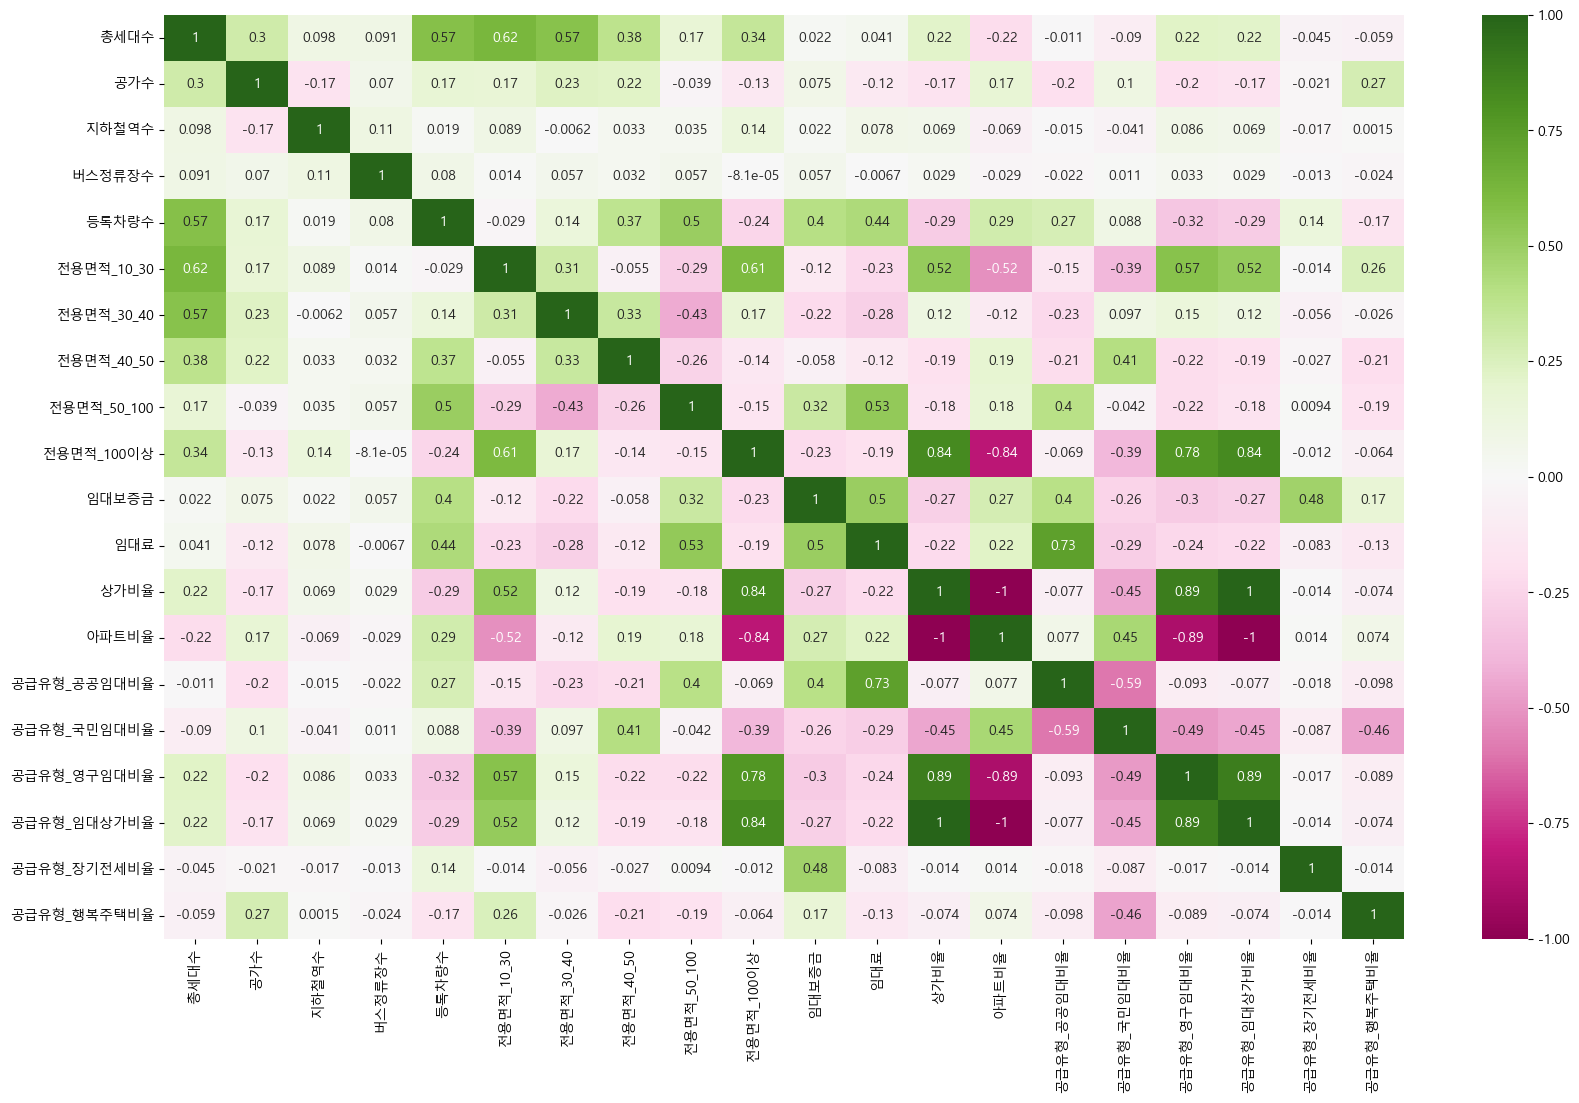

In [34]:
## 각 컬럼간 상관계수에 대한 heatmap 그래프 분석

plt.figure(figsize = (20,12))
sns.heatmap(data[col_num].corr(),cmap="PiYG", annot=True)
plt.show()

* <span style="color:green"> 질문) Target 등록차량수와 상관 관계가 높은 Feature 컬럼은 무엇인가? (7개 선택)

### target과 상관계수 상위 5개 살펴보기

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-2) 수치형 vs 수치형 (등록차량수) 분석

* 통계 분석 : 상관분석
* 그래프 분석 : regplot

In [35]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

In [36]:
# 상위 5개 변수 정의

analyze_features = ['총세대수', '전용면적_50_100',  '임대료', '임대보증금','전용면적_40_50']

[총세대수] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
총세대수  vs  등록차량수  상관 분석:  PearsonRResult(statistic=0.5737568151788701, pvalue=4.889644377463409e-34)
통계분석 결과 : 총세대수는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


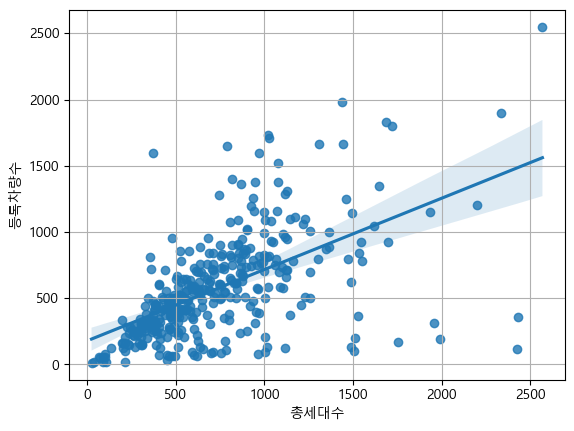


--------------------------------------------------
[전용면적_50_100] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
전용면적_50_100  vs  등록차량수  상관 분석:  PearsonRResult(statistic=0.5043508313873581, pvalue=1.836498149567305e-25)
통계분석 결과 : 전용면적_50_100는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


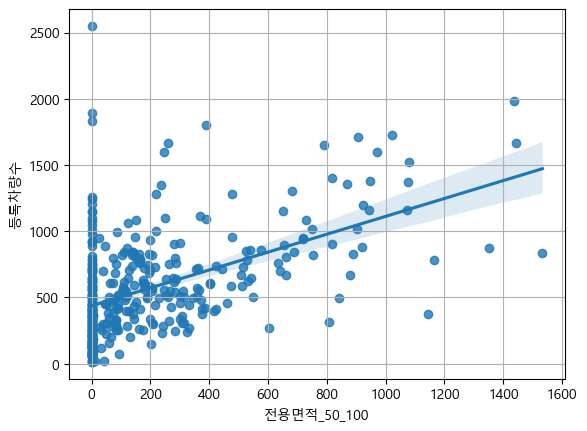


--------------------------------------------------
[임대료] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
임대료  vs  등록차량수  상관 분석:  PearsonRResult(statistic=0.4360803615532622, pvalue=9.550364432415513e-19)
통계분석 결과 : 임대료는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


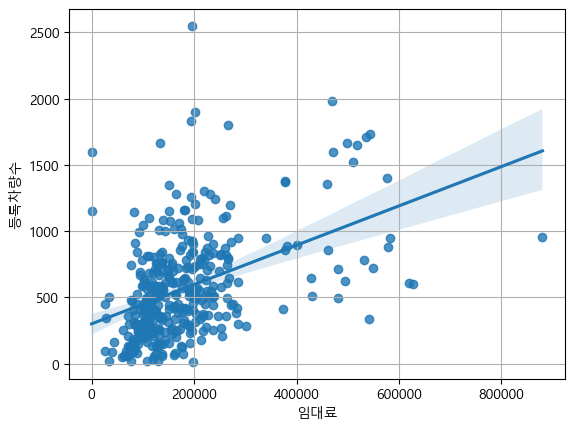


--------------------------------------------------
[임대보증금] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
임대보증금  vs  등록차량수  상관 분석:  PearsonRResult(statistic=0.40483611774656014, pvalue=3.833318324677681e-16)
통계분석 결과 : 임대보증금는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


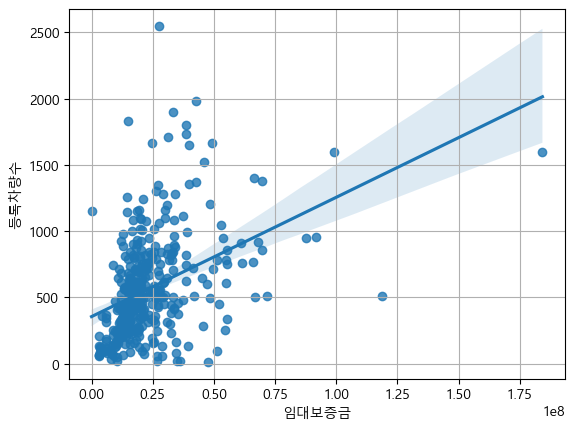


--------------------------------------------------
[전용면적_40_50] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
전용면적_40_50  vs  등록차량수  상관 분석:  PearsonRResult(statistic=0.3699784710729974, pvalue=1.5224814171177365e-13)
통계분석 결과 : 전용면적_40_50는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


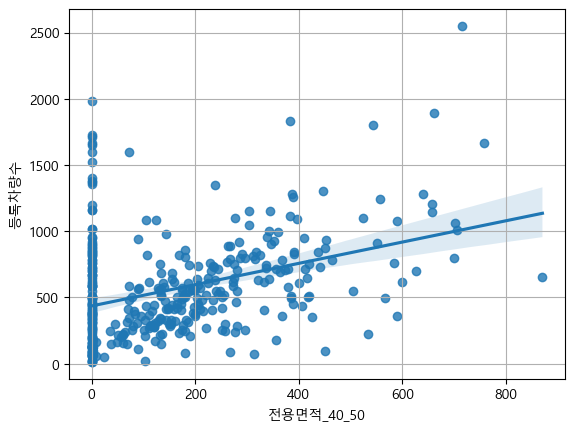


--------------------------------------------------


In [37]:

target = '등록차량수'

for feature in analyze_features:

    print(f"[{feature}] 통계 분석 및 그래프 분석")

    # 통계 분석 : 통계 분석

    print("   ***** 통계 분석 *****")
    result = spst.pearsonr(data[feature], data[target])
    print(feature, " vs ", target, " 상관 분석: ", spst.pearsonr(data[feature], data[target]))
    
    if result[1] > 0.05:
        print(f"통계분석 결과 : {feature}는 등록차량수에 영향을 주지 않는다")
    else:
        print(f"통계분석 결과 : {feature}는 등록차량수에 영향을 준다")

    # 그래프 분석 : regplot

    # plt.figure(figsize = (12,8))
    print("   ***** 그래프 분석 *****")
    sns.regplot(x = feature, y= target, data = data)
    plt.grid()
    plt.show()
    
    print("")
    print("-"*50)
    

#### &nbsp;&nbsp; 3-2) 범주형 feature -> 수치형 target

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-1) 지역

In [38]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

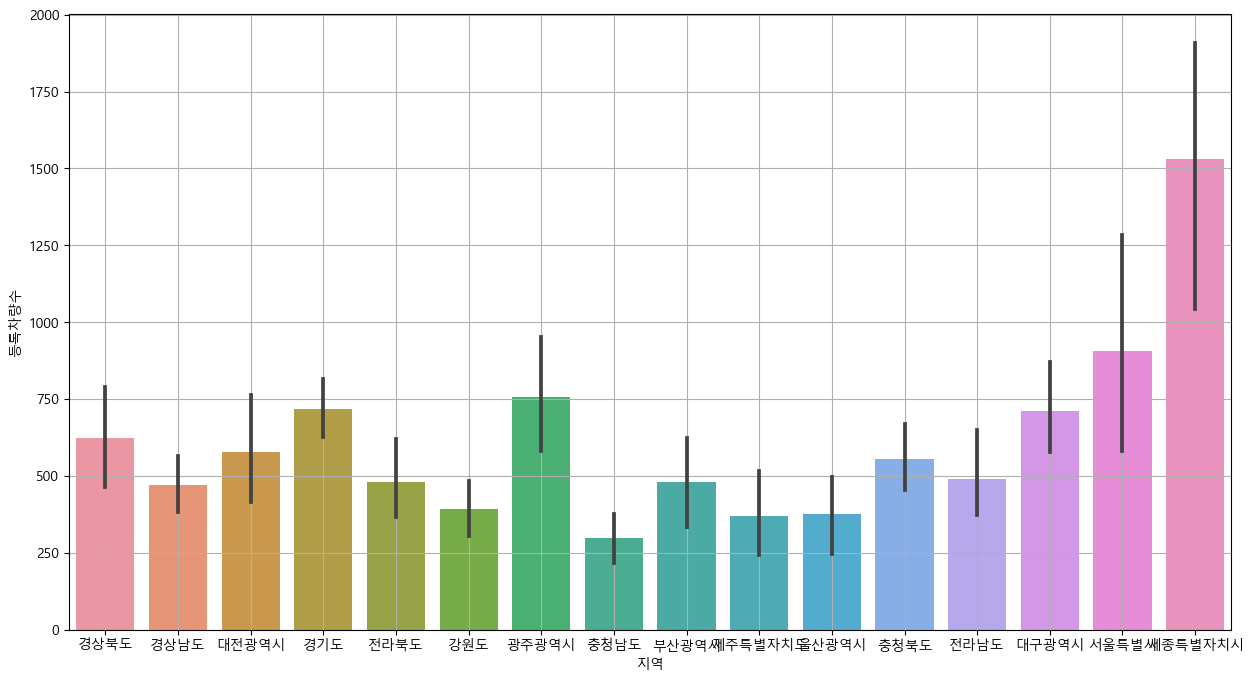

In [39]:
## 그래프 분석

plt.figure(figsize = (15,8))
sns.barplot(x='지역', y='등록차량수', data = data)
plt.grid()
plt.show()

In [40]:
# 분산 분석

anova_1 = data.loc[data['지역']=='세종특별자치시', '등록차량수']
anova_2 = data.loc[data['지역']=='광주광역시', '등록차량수']
anova_3 = data.loc[data['지역']=='충청남도', '등록차량수']

spst.f_oneway(anova_1, anova_2, anova_3)

F_onewayResult(statistic=20.41264934690658, pvalue=8.590512371668836e-07)

## [정리] 이변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

## <font color="orange">**4. 도전 미션** </font>

#### &nbsp;&nbsp; target을 '등록차량수_비율'로 바꿔 분석하기

  - 데이터프레임을 re_data에 복사하고, '등록차량수_비율' 열 추가 : '등록차량수' / '총세대수'
  - '등록차량수_비율'에 대한 단변량 분석
  - 전체 수치형 데이터에 대한 상관 관계 분석
  - Target '등록차량수_비율'에 영향을 미치는 상위 5개 선정 및 이변량 분석
  - 비즈니스 인사이트 도출

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1) '등록차량수_비율' 열 추가

In [4]:
re_data = data.copy()

re_data['등록차량수_비율'] = round(re_data['등록차량수'] / re_data['총세대수'], 2)
re_data

단지코드  총세대수       지역   공가수  지하철역수  버스정류장수   등록차량수  전용면적_10_30  \
0    C2483   900     경상북도  38.0    0.0     3.0  1015.0           0   
1    C2515   545     경상남도  17.0    0.0     3.0   205.0           0   
2    C1407  1216    대전광역시  13.0    1.0     1.0  1064.0           0   
3    C1945   755      경기도   6.0    1.0     3.0   730.0           0   
4    C1470   696     전라북도  14.0    0.0     2.0   553.0           0   
..     ...   ...      ...   ...    ...     ...     ...         ...   
368  C2586    90  제주특별자치도   7.0    0.0     3.0    57.0          54   
369  C2035   492      강원도  24.0    0.0     1.0   246.0         156   
370  C2020    40    부산광역시   7.0    1.0     2.0    19.0          25   
371  C2437    90     충청북도  12.0    0.0     1.0    16.0          90   
372  C2532   239      강원도   7.0    0.0     1.0   146.0           0   

     전용면적_30_40  전용면적_40_50  ...            임대료  상가비율  아파트비율  공급유형_공공임대비율  \
0           149           0  ...  173838.877778   0.0    1.0          0.0   
1           356          57  ...  119431.266055   0.0    1.0          0.0   
2           390         702  ...  171132.236842   0.0    1.0          0.0   
3           240           0  ...  187414.211921   0.0    1.0          0.0   
4           254         196  ...  125449.224138   0.0    1.0          0.0   
..          ...         ...  ...            ...   ...    ...          ...   
368          36           0  ...  122286.666667   0.0    1.0          0.0   
369         156         180  ...  167341.463415   0.0    1.0          0.0   
370          15           0  ...  130016.250000   0.0    1.0          0.0   
371           0           0  ...  107530.000000   0.0    1.0          0.0   
372           0          38  ...  138834.351464   0.0    1.0          0.0   

     공급유형_국민임대비율  공급유형_영구임대비율  공급유형_임대상가비율  공급유형_장기전세비율  공급유형_행복주택비율  등록차량수_비율  
0            1.0          0.0          0.0          0.0          0.0      1.13  
1            1.0          0.0          0.0          0.0          0.0      0.38  
2            1.0          0.0          0.0          0.0          0.0      0.88  
3            1.0          0.0          0.0          0.0          0.0      0.97  
4            1.0          0.0          0.0          0.0          0.0      0.79  
..           ...          ...          ...          ...          ...       ...  
368          0.0          0.0          0.0          0.0          1.0      0.63  
369          1.0          0.0          0.0          0.0          0.0      0.50  
370          0.0          0.0          0.0          0.0          1.0      0.48  
371          0.0          1.0          0.0          0.0          0.0      0.18  
372          1.0          0.0          0.0          0.0          0.0      0.61  

[373 rows x 23 columns]

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2) '등록차량수_비율'에 대한 단변량 분석

count      mean       std   min  25%   50%  75%   max
등록차량수_비율  373.0  0.824048  0.409641  0.05  0.6  0.82  1.0  4.31

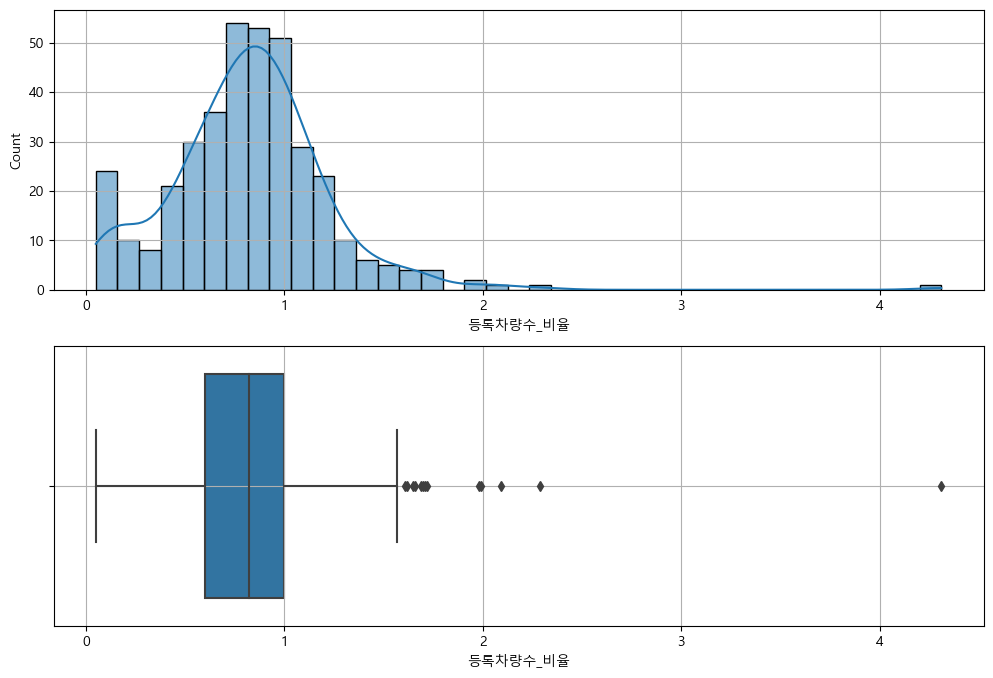

In [42]:
## '등록차량수' 변수의 기초통계량 확인
display(re_data[['등록차량수_비율']].describe().T)

## 2행 1열 그래프 그리기

plt.figure(figsize = (12,8))

## '등록차량수' 변수의 histplot그리기

plt.subplot(2,1,1)
sns.histplot(x = '등록차량수_비율', data = re_data, kde = True)
plt.grid()

## '등록차량수' 변수의 boxplot 그리기

plt.subplot(2,1,2)
sns.boxplot(x = '등록차량수_비율', data = re_data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-3) 모든 수치형 데이터에 대한 상관관계 분석

In [5]:
## 수치형 데이터 컬럼의 리스트 정의

col_num = ['총세대수','공가수','지하철역수','버스정류장수', '등록차량수','전용면적_10_30', '전용면적_30_40', '전용면적_40_50', '전용면적_50_100',
            '전용면적_100이상', '임대보증금', '임대료', '상가비율','아파트비율', '공급유형_공공임대비율', '공급유형_국민임대비율', '공급유형_영구임대비율',
       '공급유형_임대상가비율', '공급유형_장기전세비율', '공급유형_행복주택비율','등록차량수_비율']


In [6]:
## 데이터 프레임의 상관계수 도출하기 : corr
re_data[col_num].corr()

총세대수       공가수     지하철역수    버스정류장수     등록차량수  전용면적_10_30  \
총세대수         1.000000  0.300972  0.102252  0.090344  0.573757    0.621717   
공가수          0.300972  1.000000 -0.184022  0.070619  0.174177    0.171364   
지하철역수        0.102252 -0.184022  1.000000  0.112852  0.009658    0.095781   
버스정류장수       0.090344  0.070619  0.112852  1.000000  0.082549    0.012130   
등록차량수        0.573757  0.174177  0.009658  0.082549  1.000000   -0.029044   
전용면적_10_30   0.621717  0.171364  0.095781  0.012130 -0.029044    1.000000   
전용면적_30_40   0.567307  0.230676 -0.000842  0.053057  0.143853    0.311106   
전용면적_40_50   0.376642  0.224844  0.029032  0.028384  0.369978   -0.055416   
전용면적_50_100  0.165674 -0.038809  0.035103  0.062338  0.504351   -0.289054   
전용면적_100이상   0.343834 -0.132053  0.175033 -0.000915 -0.244813    0.607141   
임대보증금        0.022378  0.074599  0.014707  0.064109  0.404836   -0.124160   
임대료          0.040665 -0.124052  0.074779  0.002251  0.436080   -0.226856   
상가비율         0.216495 -0.173287  0.094571  0.028060 -0.294677    0.521303   
아파트비율       -0.216495  0.173287 -0.094571 -0.028060  0.294677   -0.521303   
공급유형_공공임대비율 -0.011118 -0.198014 -0.005995 -0.011463  0.268592   -0.146042   
공급유형_국민임대비율 -0.089556  0.104461 -0.056966  0.004794  0.088222   -0.389778   
공급유형_영구임대비율  0.223311 -0.198355  0.112269  0.031751 -0.321637    0.565164   
공급유형_임대상가비율  0.216495 -0.173287  0.094571  0.028060 -0.294677    0.521303   
공급유형_장기전세비율 -0.044824 -0.021119 -0.017655 -0.013052  0.138009   -0.014467   
공급유형_행복주택비율 -0.058551  0.274663 -0.003063 -0.025026 -0.169308    0.256192   
등록차량수_비율    -0.173939 -0.103581 -0.045151 -0.036115  0.583285   -0.415631   

             전용면적_30_40  전용면적_40_50  전용면적_50_100  전용면적_100이상  ...       임대료  \
총세대수           0.567307    0.376642     0.165674    0.343834  ...  0.040665   
공가수            0.230676    0.224844    -0.038809   -0.132053  ... -0.124052   
지하철역수         -0.000842    0.029032     0.035103    0.175033  ...  0.074779   
버스정류장수         0.053057    0.028384     0.062338   -0.000915  ...  0.002251   
등록차량수          0.143853    0.369978     0.504351   -0.244813  ...  0.436080   
전용면적_10_30     0.311106   -0.055416    -0.289054    0.607141  ... -0.226856   
전용면적_30_40     1.000000    0.332582    -0.431869    0.170742  ... -0.276292   
전용면적_40_50     0.332582    1.000000    -0.260216   -0.140497  ... -0.123859   
전용면적_50_100   -0.431869   -0.260216     1.000000   -0.151956  ...  0.526578   
전용면적_100이상     0.170742   -0.140497    -0.151956    1.000000  ... -0.194916   
임대보증금         -0.220113   -0.057631     0.324847   -0.225275  ...  0.504804   
임대료           -0.276292   -0.123859     0.526578   -0.194916  ...  1.000000   
상가비율           0.115488   -0.193558    -0.176467    0.835547  ... -0.222297   
아파트비율         -0.115488    0.193558     0.176467   -0.835547  ...  0.222297   
공급유형_공공임대비율   -0.230939   -0.213007     0.397880   -0.069492  ...  0.730079   
공급유형_국민임대비율    0.097016    0.406756    -0.042423   -0.389036  ... -0.287284   
공급유형_영구임대비율    0.145753   -0.215012    -0.217425    0.775950  ... -0.235731   
공급유형_임대상가비율    0.115488   -0.193558    -0.176467    0.835547  ... -0.222297   
공급유형_장기전세비율   -0.056431   -0.026749     0.009373   -0.011991  ... -0.082815   
공급유형_행복주택비율   -0.025843   -0.207025    -0.186713   -0.064154  ... -0.132725   
등록차량수_비율      -0.353243    0.010824     0.398810   -0.392160  ...  0.483072   

                 상가비율     아파트비율  공급유형_공공임대비율  공급유형_국민임대비율  공급유형_영구임대비율  \
총세대수         0.216495 -0.216495    -0.011118    -0.089556     0.223311   
공가수         -0.173287  0.173287    -0.198014     0.104461    -0.198355   
지하철역수        0.094571 -0.094571    -0.005995    -0.056966     0.112269   
버스정류장수       0.028060 -0.028060    -0.011463     0.004794     0.031751   
등록차량수       -0.294677  0.294677     0.268592     0.088222    -0.321637   
전용면적_10_30   0.521303 -0.521303    -0.146042    -0.389778     0.565164   
전용면적_30_40   0.115488 -0.115488    -0.230939     0.097016     0.1

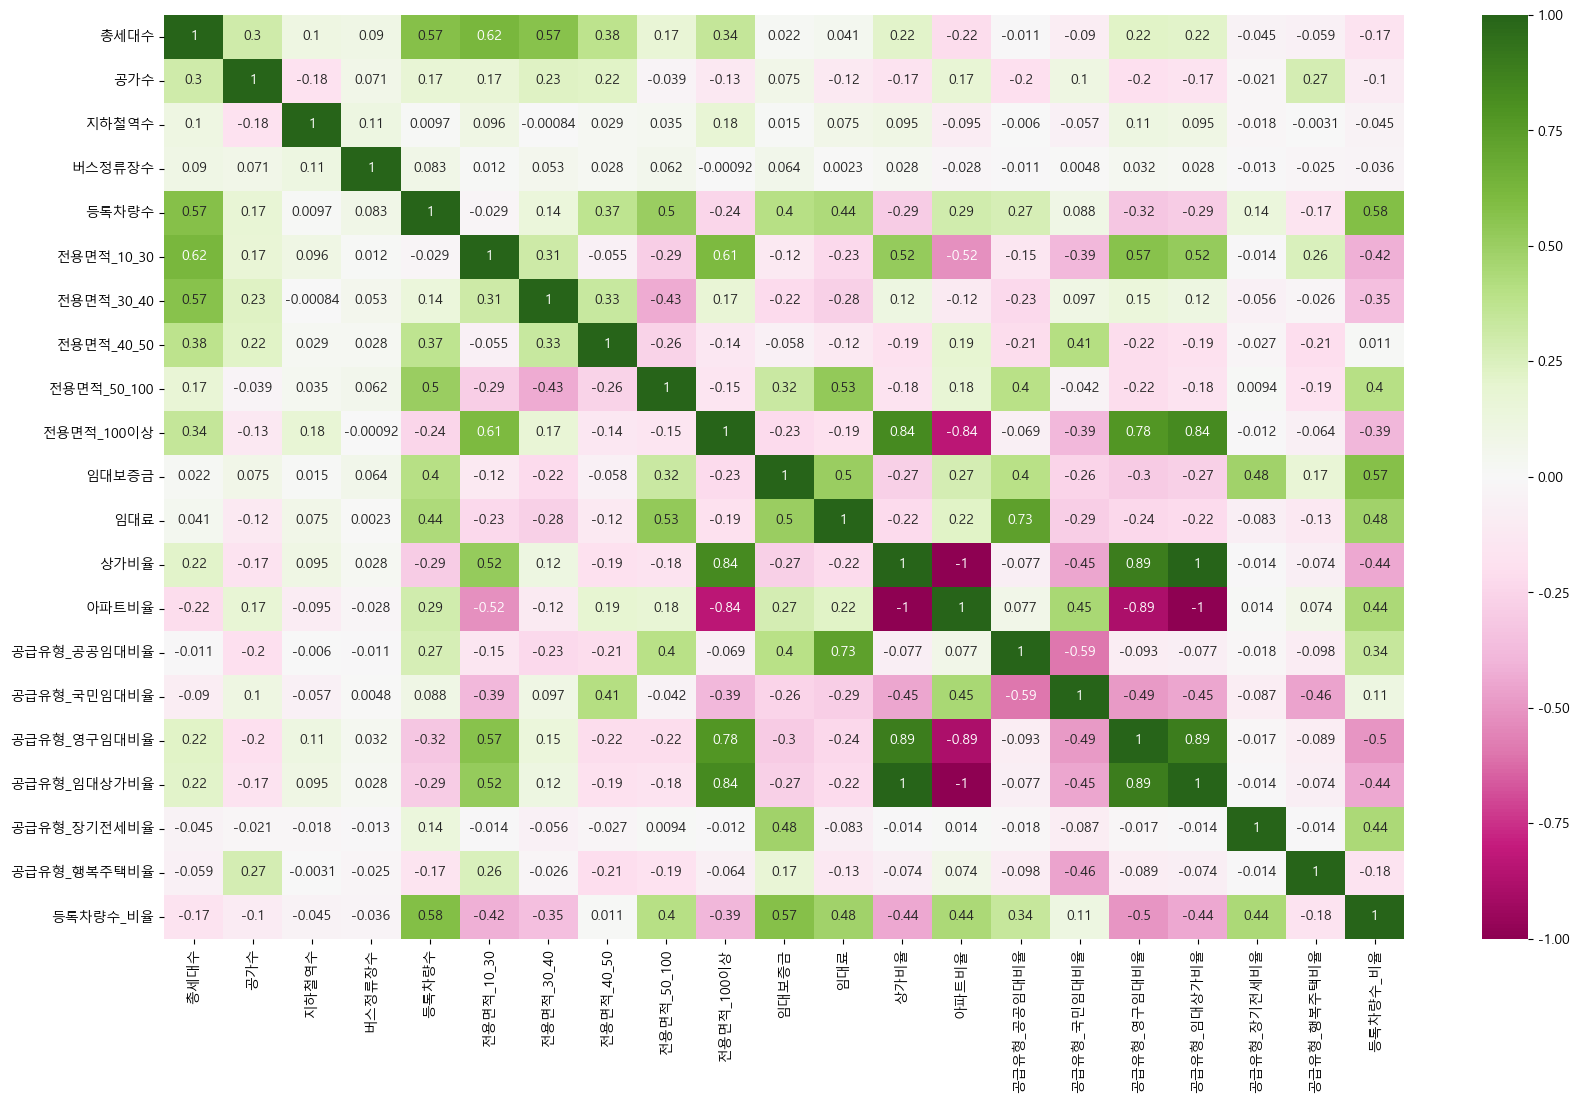

In [7]:
## 상관계수값을 heatmap을 이용하여 시각화 : sns.heatmap

plt.figure(figsize = (20,12))
sns.heatmap(re_data[col_num].corr(),cmap="PiYG", annot=True)
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-4) 상위 5개 선정 및 이변량 분석 

[임대보증금] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
임대보증금  vs  등록차량수_비율  상관 분석:  PearsonRResult(statistic=0.574922199973604, pvalue=3.3688431491059467e-34)
통계분석 결과 : 임대보증금는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


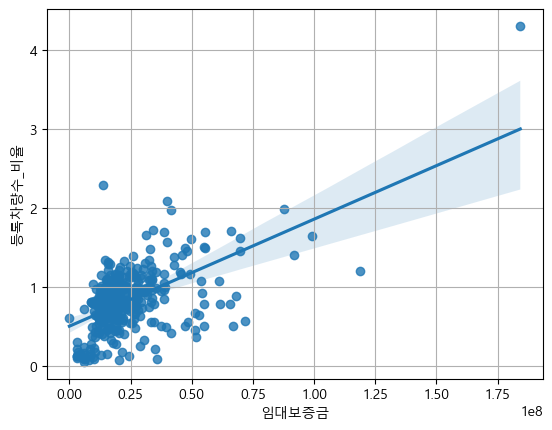


--------------------------------------------------
[공급유형_영구임대비율] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
공급유형_영구임대비율  vs  등록차량수_비율  상관 분석:  PearsonRResult(statistic=-0.5013975754316211, pvalue=3.861626228329377e-25)
통계분석 결과 : 공급유형_영구임대비율는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


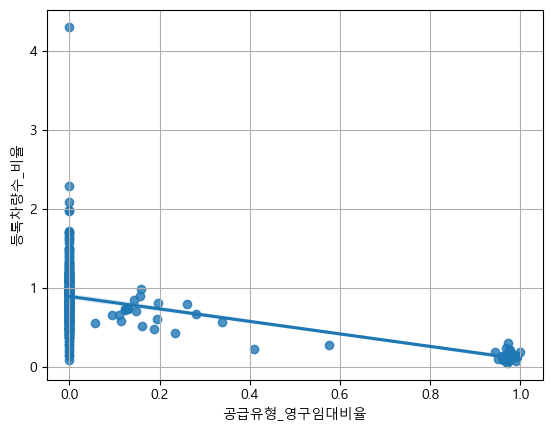


--------------------------------------------------
[임대료] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
임대료  vs  등록차량수_비율  상관 분석:  PearsonRResult(statistic=0.48307209087877945, pvalue=3.3194392689751214e-23)
통계분석 결과 : 임대료는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


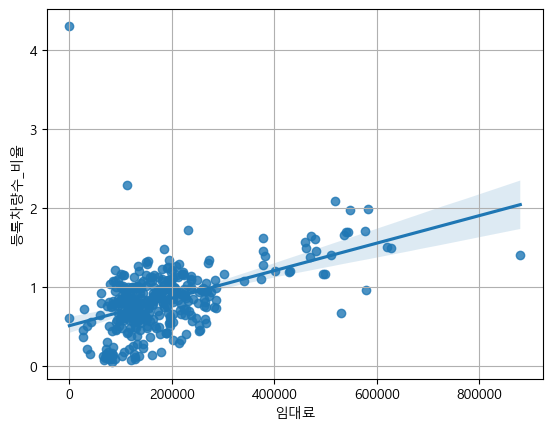


--------------------------------------------------
[아파트비율] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
아파트비율  vs  등록차량수_비율  상관 분석:  PearsonRResult(statistic=0.44222391583725623, pvalue=2.726009825126599e-19)
통계분석 결과 : 아파트비율는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


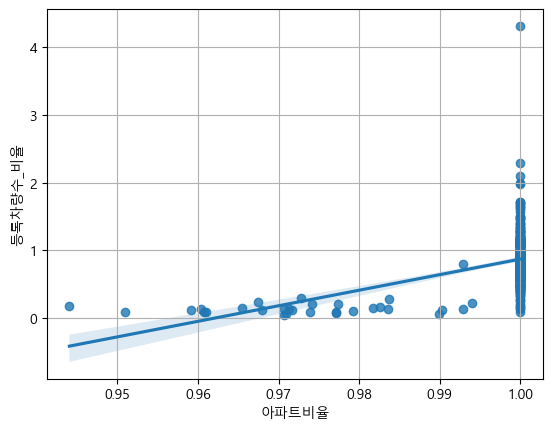


--------------------------------------------------
[공급유형_장기전세비율] 통계 분석 및 그래프 분석
   ***** 통계 분석 *****
공급유형_장기전세비율  vs  등록차량수_비율  상관 분석:  PearsonRResult(statistic=0.441804317760764, pvalue=2.9721338976001867e-19)
통계분석 결과 : 공급유형_장기전세비율는 등록차량수에 영향을 준다
   ***** 그래프 분석 *****


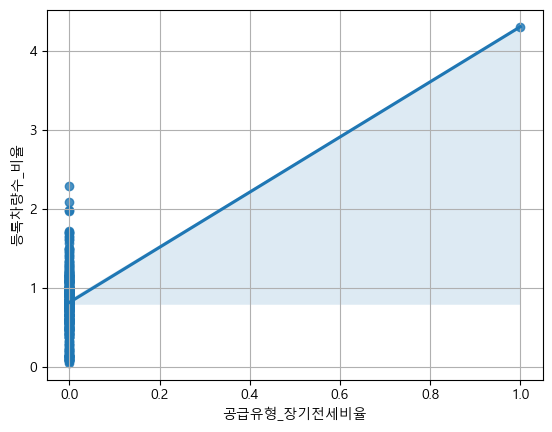


--------------------------------------------------


In [44]:
analyze_features = ['임대보증금', '공급유형_영구임대비율', '임대료', '아파트비율', '공급유형_장기전세비율' ]


target = '등록차량수_비율'

for feature in analyze_features:

    print(f"[{feature}] 통계 분석 및 그래프 분석")

    # 통계 분석 : 통계 분석

    print("   ***** 통계 분석 *****")
    result = spst.pearsonr(re_data[feature], re_data[target])
    print(feature, " vs ", target, " 상관 분석: ", result)
    
    if result[1] > 0.05:
        print(f"통계분석 결과 : {feature}는 등록차량수에 영향을 주지 않는다")
    else:
        print(f"통계분석 결과 : {feature}는 등록차량수에 영향을 준다")

    # 그래프 분석 : regplot

    # plt.figure(figsize = (12,8))
    print("   ***** 그래프 분석 *****")
    sns.regplot(x = feature, y= target, data = re_data)
    plt.grid()
    plt.show()
    
    print("")
    print("-"*50)
    

## [정리] 새로운 Target에 대한 데이터 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!